<center><h1>Time Series Classification</h1></center>

## 1. Part 1: Feature Creation/Extraction 

### (a) Obtain Data

Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import matplotlib.pyplot as plt
import seaborn as sns

Get the AReM Data Set

In [2]:
path = '../data/AReM'
folder_list = os.listdir(path)

dataset_path = []
for folder in folder_list:
    path2 = os.path.join(path, folder)
    if os.path.isdir(path2):
        for file in os.listdir(path2):
            file_path = os.path.join(path2, file)
            dataset_path.append(file_path)

# print(len(dataset_path))

### (b) Splitting Data

In [3]:
training_path = []
test_path = []
for dataset in dataset_path:
    if 'bending' in dataset:
        if 'dataset1.csv' in dataset or 'dataset2.csv' in dataset:
            test_path.append(dataset)
        else:
            training_path.append(dataset)
    elif 'dataset1.csv' in dataset or 'dataset2.csv' in dataset or 'dataset3.csv' in dataset:  
        test_path.append(dataset)
    else:
        training_path.append(dataset)
        
# print(len(training_path))
# print(len(test_path))

# datasets are manually cleaned in Excel
training_df_list = []
for path in training_path:
    df_from_path = pd.read_csv(path, header=4)
    # find the activity type from path
    activity = path[:path.rfind('/')]
    activity = activity[activity.rfind('/')+1:]
    # print(activity)
    df_from_path['activity'] = activity
    # print(df_from_path)
    training_df_list.append(df_from_path)
training_df = pd.concat(training_df_list, ignore_index=True)

test_df_list = []
for path in test_path:
    df_from_path = pd.read_csv(path, header=4)
    # find the activity type from path
    activity = path[:path.rfind('/')]
    activity = activity[activity.rfind('/')+1:]
    df_from_path['activity'] = activity
    # print(df_from_path)
    test_df_list.append(df_from_path)
test_df = pd.concat(test_df_list, ignore_index=True)

print(training_df.shape)
print(test_df.shape)

(33119, 8)
(9120, 8)


### (c) Feature Extraction

Types of time-domain features usually used in time series classiﬁcation:
- Minimum and Maximum
- Mean: measures the average value
- Standard deviation: measures how much the data points deviate from the mean
- Skewness: measures the asymmetry of a distribution
- Kurtosis: measures the tailedness (how often outliers occur) of a distribution

In [4]:
# concatenate training and test to get the entire dataset
df_list = training_df_list + test_df_list
# print(df_list)
features_df = pd.DataFrame(np.zeros((len(df_list), 42)))
features_df_activities = []
for count, df in enumerate(df_list):
    row = []
    for i in range(1, len(df.columns)-1):
        row.append(df.iloc[:, i].min())
        row.append(df.iloc[:, i].max())
        row.append(df.iloc[:, i].mean())
        row.append(df.iloc[:, i].median())
        row.append(df.iloc[:, i].std())
        row.append(df.iloc[:, i].quantile(0.25))
        row.append(df.iloc[:, i].quantile(0.75))
    features_df.loc[count] = row
    # stores the activity of each list so that we can know the activity types later
    features_df_activities.append(df['activity'][0]) 

column_name = []    
for i in range(1, 7):
    column_name.append('min'+str(i))
    column_name.append('max'+str(i))
    column_name.append('mean'+str(i))
    column_name.append('median'+str(i))
    column_name.append('standard deviation'+str(i))
    column_name.append('1st quartile'+str(i))
    column_name.append('3rd quartile'+str(i))

features_df.columns = column_name
features_df.insert(loc=0, column='Instance', value=list(range(1, 89)))
features_df.reset_index(drop=True)

features_df

Instance   min1   max1      mean1  median1  standard deviation1  \
0          1  36.25  48.00  43.969125   44.500             1.618364   
1          2  37.00  48.00  43.454958   43.250             1.386098   
2          3  33.00  47.75  42.179813   43.500             3.670666   
3          4  33.00  45.75  41.678063   41.750             2.243490   
4          5  35.00  47.40  43.954500   44.330             1.558835   
..       ...    ...    ...        ...      ...                  ...   
83        84  24.75  48.33  44.182937   48.000             7.495615   
84        85  48.00  48.25  48.004167   48.000             0.032038   
85        86  24.25  45.00  37.177042   36.250             3.581301   
86        87  28.75  44.75  37.561188   36.875             3.226507   
87        88  22.00  44.67  37.058708   36.000             3.710180   

    1st quartile1  3rd quartile1  min2   max2  ...  standard deviation5  \
0           43.31        44.6700   0.0   1.50  ...             3.318301   
1           42.50        45.0000   0.0   1.58  ...             2.488862   
2           39.15        45.0000   0.0   3.00  ...             3.849448   
3           41.33        42.7500   0.0   2.83  ...             2.411026   
4           43.00        45.0000   0.0   1.70  ...             1.999604   
..            ...            ...   ...    ...  ...                  ...   
83          48.00        48.0000   0.0   3.11  ...             3.274539   
84          48.00        48.0000   0.0   0.43  ...             3.268502   
85          34.50        40.2500   0.0   8.58  ...             2.890347   
86          35.25        40.2500   0.0   9.91  ...             2.727377   
87          34.50        40.0625   0.0  14.17  ...             3.537144   

    1st quartile5  3rd quartile5  min6  max6     mean6  median6  \
0         20.5000        23.7500   0.0  2.96  0.555313     0.49   
1         22.2500        24.0000   0.0  5.26  0.679646     0.50   
2         30.4575        36.3300   0.0  2.18  0.613521     0.50   
3         28.4575        31.2500   0.0  1.79  0.383292     0.43   
4         35.3625        36.5000   0.0  1.79  0.493292     0.43   
..            ...            ...   ...   ...       ...      ...   
83         2.0000         5.5425   0.0  3.91  0.692771     0.50   
84         4.6700        10.0000   0.0  2.50  0.641229     0.50   
85        17.9500        21.7500   0.0  9.34  2.921729     2.50   
86        18.0000        21.5000   0.0  9.62  2.765896     2.45   
87        16.0000        21.0000   0.0  8.55  2.983750     2.57   

    standard deviation6  1st quartile6  3rd quartile6  
0              0.487826         0.0000           0.83  
1              0.622534         0.4300           0.87  
2              0.524317         0.0000           1.00  
3              0.389164         0.0000           0.50  
4              0.513506         0.0000           0.94  
..                  ...            ...            ...  
83             0.675781         0.3225           0.94  
84             0.388372         0.4600           0.83  
85             1.852600         1.5000           3.90  
86             1.769203         1.4100           3.77  
87             1.815730         1.5000           4.15  

[88 rows x 43 columns]

In [5]:
# Standard deviation of each time-domain features extracted
features_df.iloc[:, 1:].std()

min1                   9.569975
max1                   4.394362
mean1                  5.335718
median1                5.440054
standard deviation1    1.772153
1st quartile1          6.153590
3rd quartile1          5.138925
min2                   0.000000
max2                   5.062729
mean2                  1.574164
median2                1.412244
standard deviation2    0.884105
1st quartile2          0.946386
3rd quartile2          2.125266
min3                   2.956462
max3                   4.875137
mean3                  4.008380
median3                4.036396
standard deviation3    0.946710
1st quartile3          4.220658
3rd quartile3          4.171628
min4                   0.000000
max4                   2.183625
mean4                  1.166114
median4                1.145586
standard deviation4    0.458242
1st quartile4          0.843620
3rd quartile4          1.552504
min5                   6.124001
max5                   5.741238
mean5                  5.675593
median5 

In [6]:
# 90% bootsrap conﬁdence interval for the standard deviation of each feature
feature_list = []
results_list = []
for i in range(1, len(features_df.columns)):
    feature_list.append(features_df.columns[i])
    samples = features_df[features_df.columns[i]].to_numpy()
    results = str(bs.bootstrap(samples, stat_func=bs_stats.std, alpha=0.1)).split('   ')
    results = results[1].strip()
    results_list.append(results)

ci_df = pd.DataFrame({'features': feature_list, 
                      'CI': results_list})
ci_df

features                                           CI
0                  min1       (8.321472798086283, 10.85119312985107)
1                  max1      (3.4705994957358666, 5.425337199010407)
2                 mean1       (4.763725271474244, 5.919308391291409)
3               median1       (4.853979489864056, 6.059262449394691)
4   standard deviation1      (1.5827297835641867, 1.962373770720164)
5         1st quartile1       (5.632528349078733, 6.682552317867163)
6         3rd quartile1      (4.4092357052298405, 5.910108712906268)
7                  min2                                   (0.0, 0.0)
8                  max2      (4.695482064409841, 5.4783946917752875)
9                 mean2     (1.4364105719994804, 1.7417989903920061)
10              median2     (1.2729122614099049, 1.5770800664650027)
11  standard deviation2     (0.8212177536556602, 0.9595208012131686)
12        1st quartile2     (0.8508227367114631, 1.0590803717535089)
13        3rd quartile2     (1.9447643745805787, 2.3495814115385327)
14                 min3      (2.789932311112355, 3.1391208703632705)
15                 max3       (4.264730066052718, 5.531389045391281)
16                mean3      (3.5067407923039076, 4.577207028035154)
17              median3      (3.516231240255399, 4.6052114072683095)
18  standard deviation3     (0.7640972706603189, 1.1247303574271845)
19        1st quartile3      (3.7114758355562776, 4.798970295365953)
20        3rd quartile3      (3.6267741644047478, 4.763129371641541)
21                 min4                                   (0.0, 0.0)
22                 max4       (1.99575474950278, 2.3789922837878237)
23                mean4      (1.102291096444453, 1.2487542556226447)
24              median4     (1.0839715183404397, 1.2317633770866296)
25  standard deviation4   (0.42784717833455294, 0.49251064817597473)
26        1st quartile4     (0.7911855666232732, 0.9086691183362512)
27        3rd quartile4      (1.468628858549133, 1.6634736842601048)
28                 min5       (4.721609873019166, 7.756703617151721)
29                 max5       (4.896850913085304, 6.699723820920899)
30                mean5       (4.564896989945302, 6.863035805895276)
31              median5       (4.698509479704714, 7.051221318920512)
32  standard deviation5     (0.8250711739893344, 1.2291666330760962)
33        1st quartile5       (4.964268912614304, 7.361983146275093)
34        3rd quartile5       (4.529920547628538, 6.675879654140448)
35                 min6  (0.013124961748951322, 0.09115393165518614)
36                 max6      (2.264961532544694, 2.7770632912687128)
37                mean6      (1.087981603070274, 1.2431751216456413)
38              median6      (1.018060631404916, 1.1718928205239794)
39  standard deviation6    (0.48758777360212346, 0.5536482037274888)
40        1st quartile6     (0.7047459750540188, 0.8222355605965009)
41        3rd quartile6      (1.4378626123796148, 1.637913545324649)

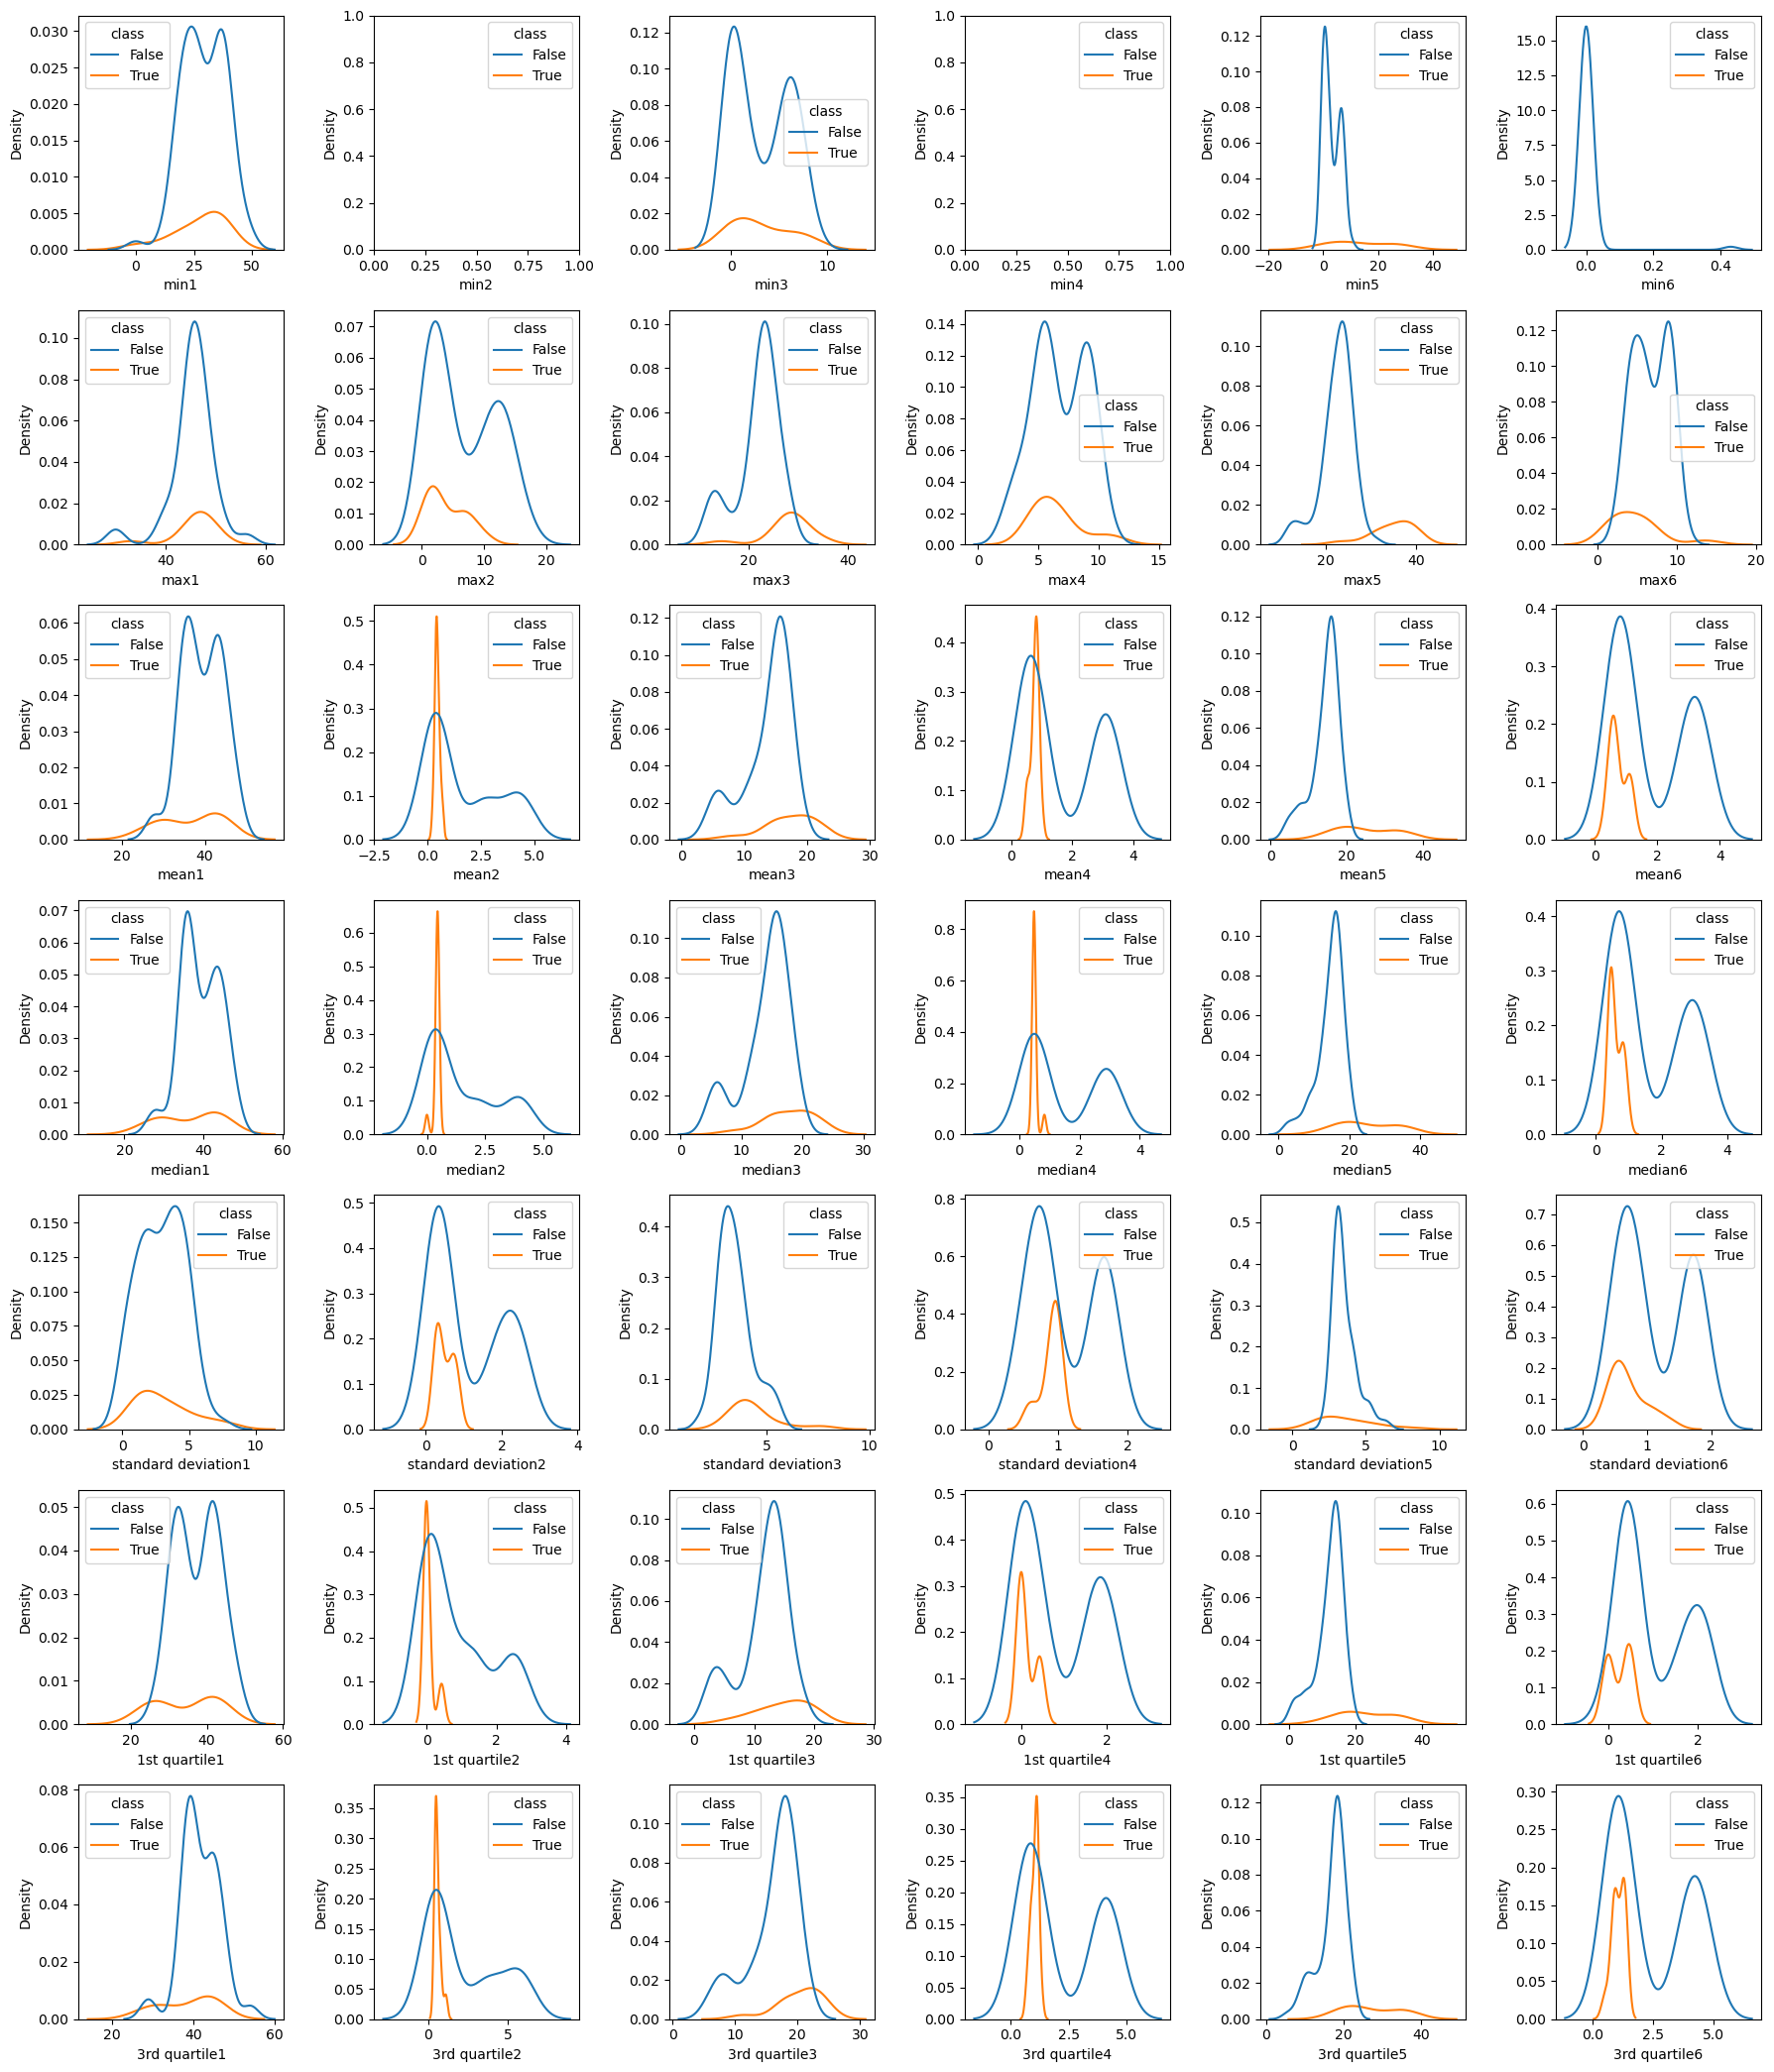

In [7]:
features_df['activity'] = features_df_activities
features_df['class'] = features_df['activity'].isin(['bending1', 'bending2'])

time_feature_list = [feature[:-1] for feature in column_name[:7]]
# print(time_feature_list)

fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(18,21))
for row, feature in enumerate(time_feature_list):
    for col in range(6):
        x = feature + str(col + 1)
        sns.kdeplot(ax=axes[row, col], data=features_df, x=x, hue='class', warn_singular=False)

fig.tight_layout()
plt.show()

In [8]:
features_df

Instance   min1   max1      mean1  median1  standard deviation1  \
0          1  36.25  48.00  43.969125   44.500             1.618364   
1          2  37.00  48.00  43.454958   43.250             1.386098   
2          3  33.00  47.75  42.179813   43.500             3.670666   
3          4  33.00  45.75  41.678063   41.750             2.243490   
4          5  35.00  47.40  43.954500   44.330             1.558835   
..       ...    ...    ...        ...      ...                  ...   
83        84  24.75  48.33  44.182937   48.000             7.495615   
84        85  48.00  48.25  48.004167   48.000             0.032038   
85        86  24.25  45.00  37.177042   36.250             3.581301   
86        87  28.75  44.75  37.561188   36.875             3.226507   
87        88  22.00  44.67  37.058708   36.000             3.710180   

    1st quartile1  3rd quartile1  min2   max2  ...  3rd quartile5  min6  max6  \
0           43.31        44.6700   0.0   1.50  ...        23.7500   0.0  2.96   
1           42.50        45.0000   0.0   1.58  ...        24.0000   0.0  5.26   
2           39.15        45.0000   0.0   3.00  ...        36.3300   0.0  2.18   
3           41.33        42.7500   0.0   2.83  ...        31.2500   0.0  1.79   
4           43.00        45.0000   0.0   1.70  ...        36.5000   0.0  1.79   
..            ...            ...   ...    ...  ...            ...   ...   ...   
83          48.00        48.0000   0.0   3.11  ...         5.5425   0.0  3.91   
84          48.00        48.0000   0.0   0.43  ...        10.0000   0.0  2.50   
85          34.50        40.2500   0.0   8.58  ...        21.7500   0.0  9.34   
86          35.25        40.2500   0.0   9.91  ...        21.5000   0.0  9.62   
87          34.50        40.0625   0.0  14.17  ...        21.0000   0.0  8.55   

       mean6  median6  standard deviation6  1st quartile6  3rd quartile6  \
0   0.555313     0.49             0.487826         0.0000           0.83   
1   0.679646     0.50             0.622534         0.4300           0.87   
2   0.613521     0.50             0.524317         0.0000           1.00   
3   0.383292     0.43             0.389164         0.0000           0.50   
4   0.493292     0.43             0.513506         0.0000           0.94   
..       ...      ...                  ...            ...            ...   
83  0.692771     0.50             0.675781         0.3225           0.94   
84  0.641229     0.50             0.388372         0.4600           0.83   
85  2.921729     2.50             1.852600         1.5000           3.90   
86  2.765896     2.45             1.769203         1.4100           3.77   
87  2.983750     2.57             1.815730         1.5000           4.15   

    activity  class  
0   bending1   True  
1   bending1   True  
2   bending1   True  
3   bending1   True  
4   bending1   True  
..       ...    ...  
83     lying  False  
84     lying  False  
85   cycling  False  
86   cycling  False  
87   cycling  False  

[88 rows x 45 columns]

Based on the previous research in (c)i and the plot, I selected **mean, standard deviation, and 3rd quartile** as the three most important time-domain features. According to the researches, mean and standard deviation are frequently used in time series classiﬁcation. The plot also show that the distribution of means of bending and not bending are very different. As mean is chosen, median might not be chose because mean and median are similar. Similarly, the distribution of standard deviation and 3rd quantile also display some differences between bending and not bending, thus these two features are worth researching in the subsequent problems.

## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

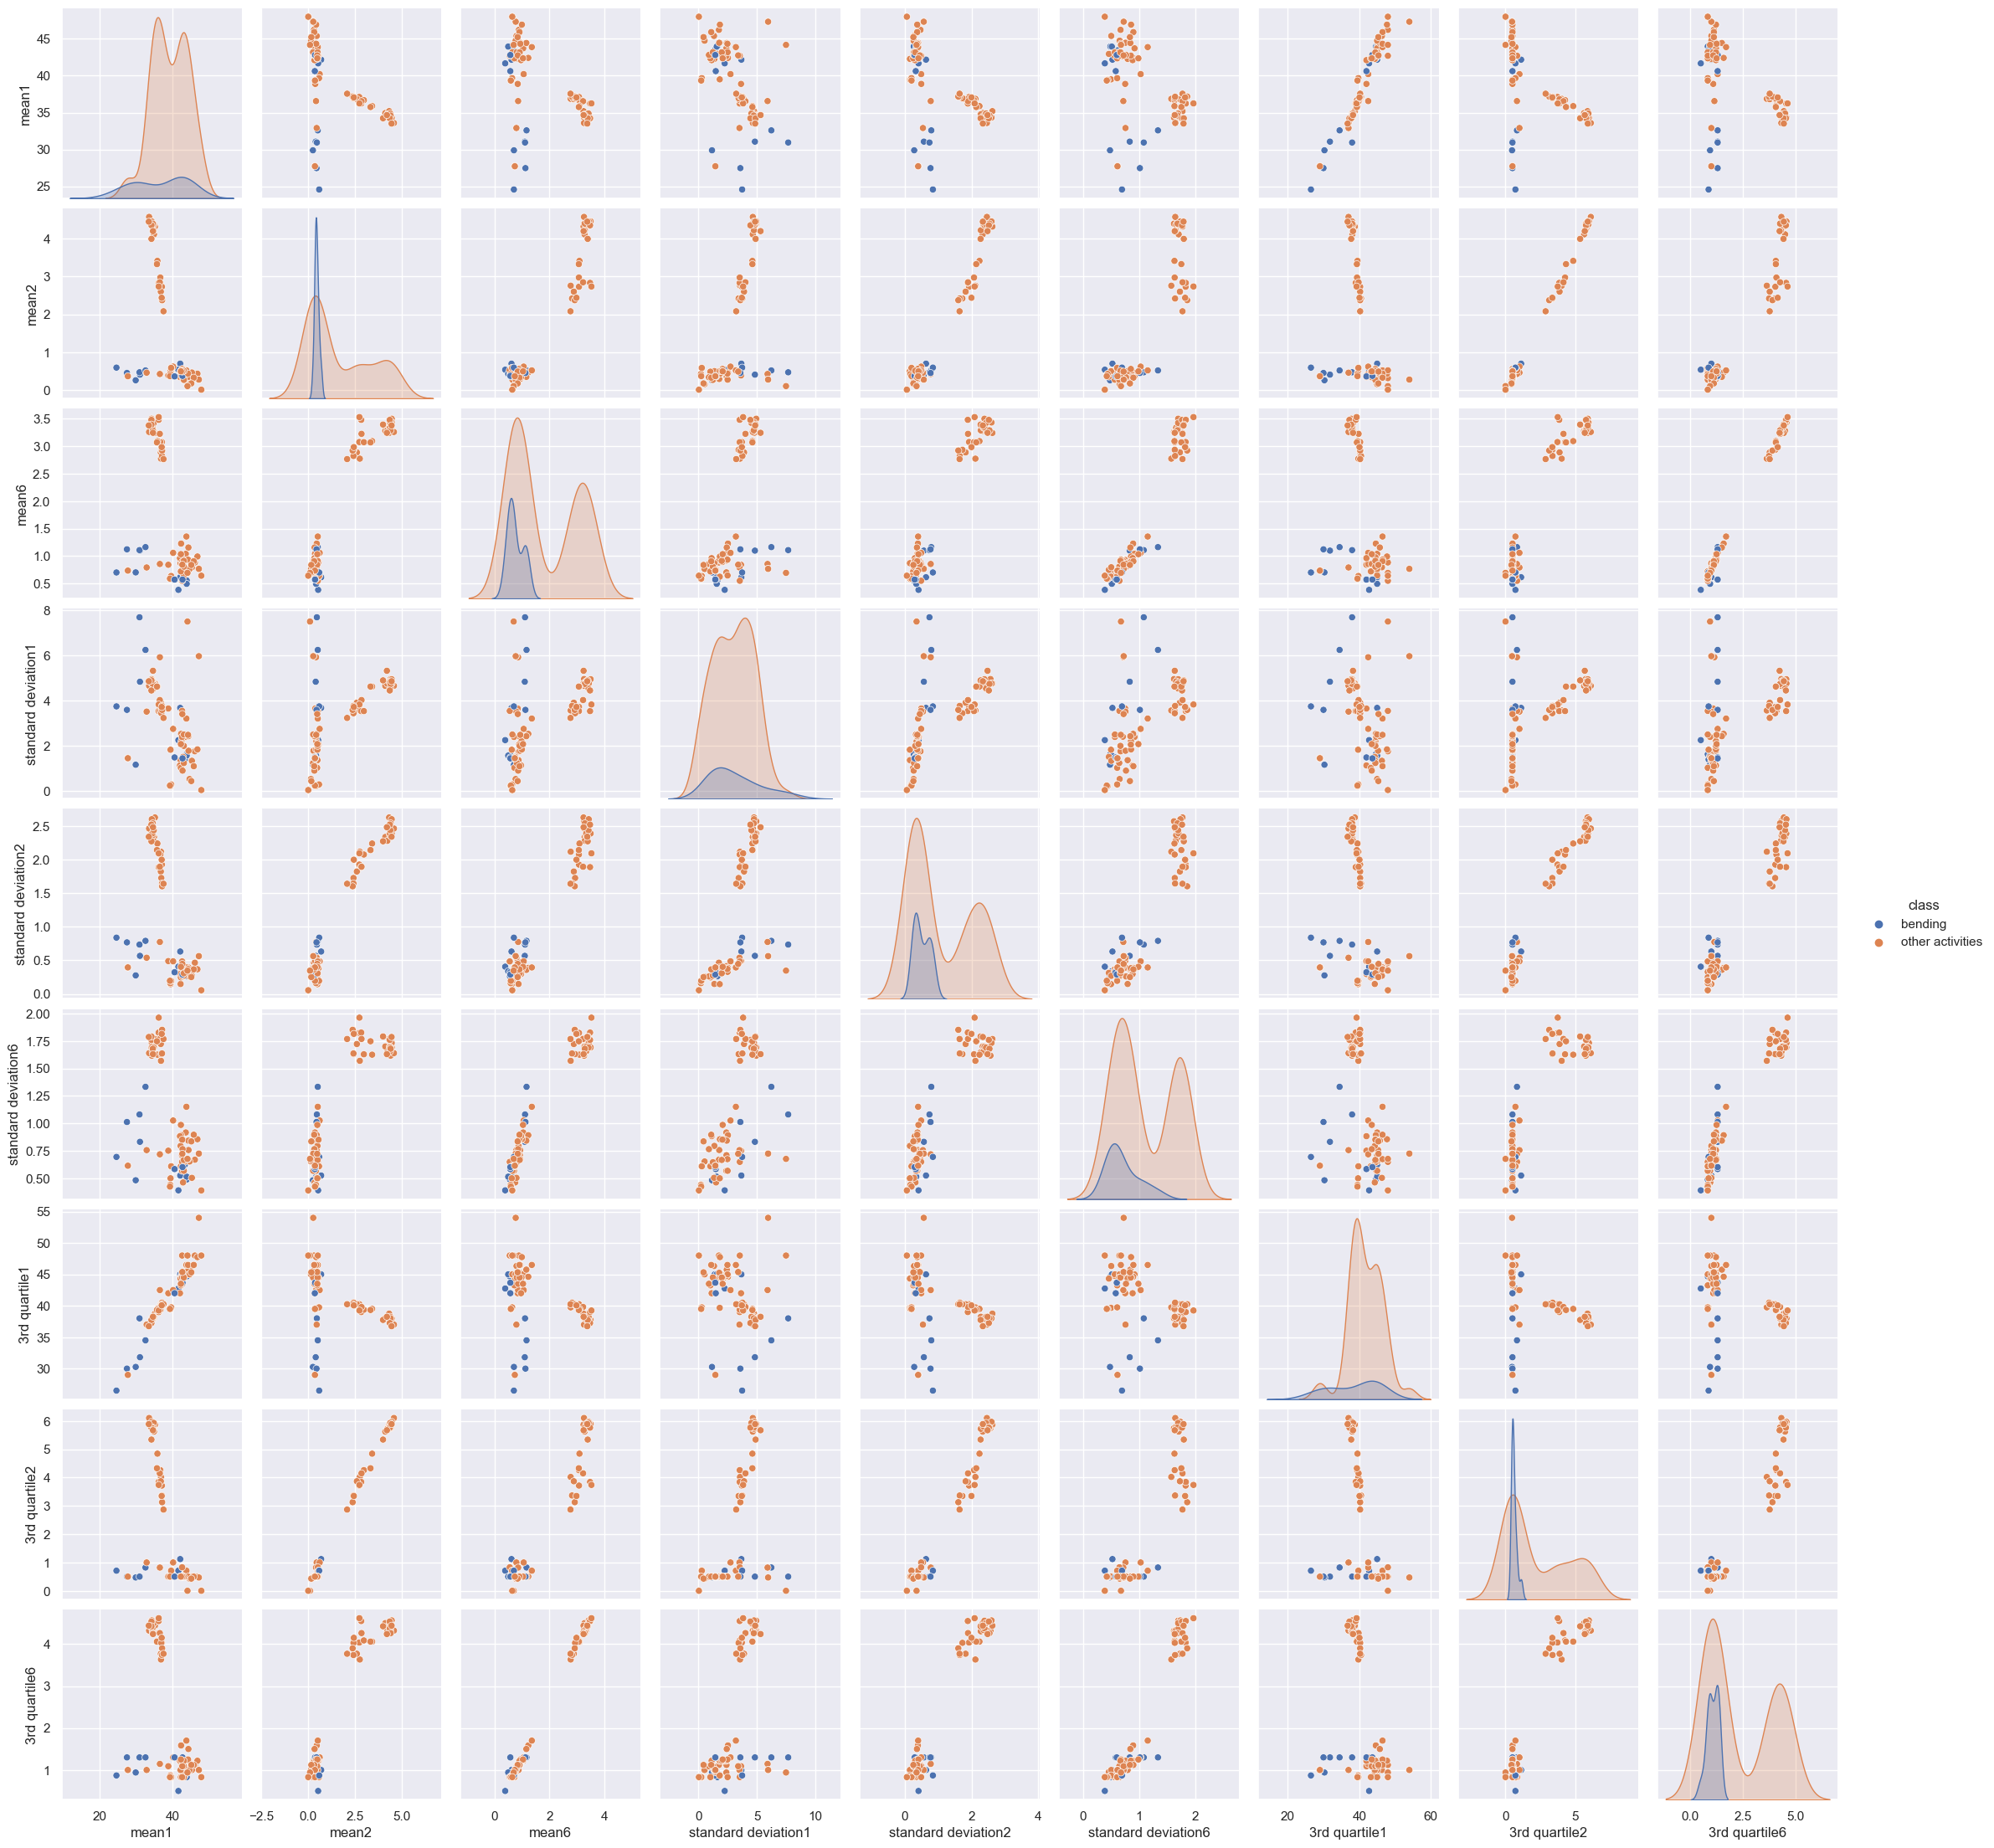

In [9]:
features_df['class'].replace({True: 'bending', False: 'other activities'}, inplace=True)

selected_features = []
for feature in ['mean', 'standard deviation', '3rd quartile']:
    for num in [1, 2, 6]:
        selected_features.append(feature + str(num))

# print(selected_features)

sns.set_theme()
pairplot1 = sns.pairplot(features_df, hue='class', vars=selected_features)
# pairplot1.savefig('pairplot1.png')

#### ii. Splitted Plots

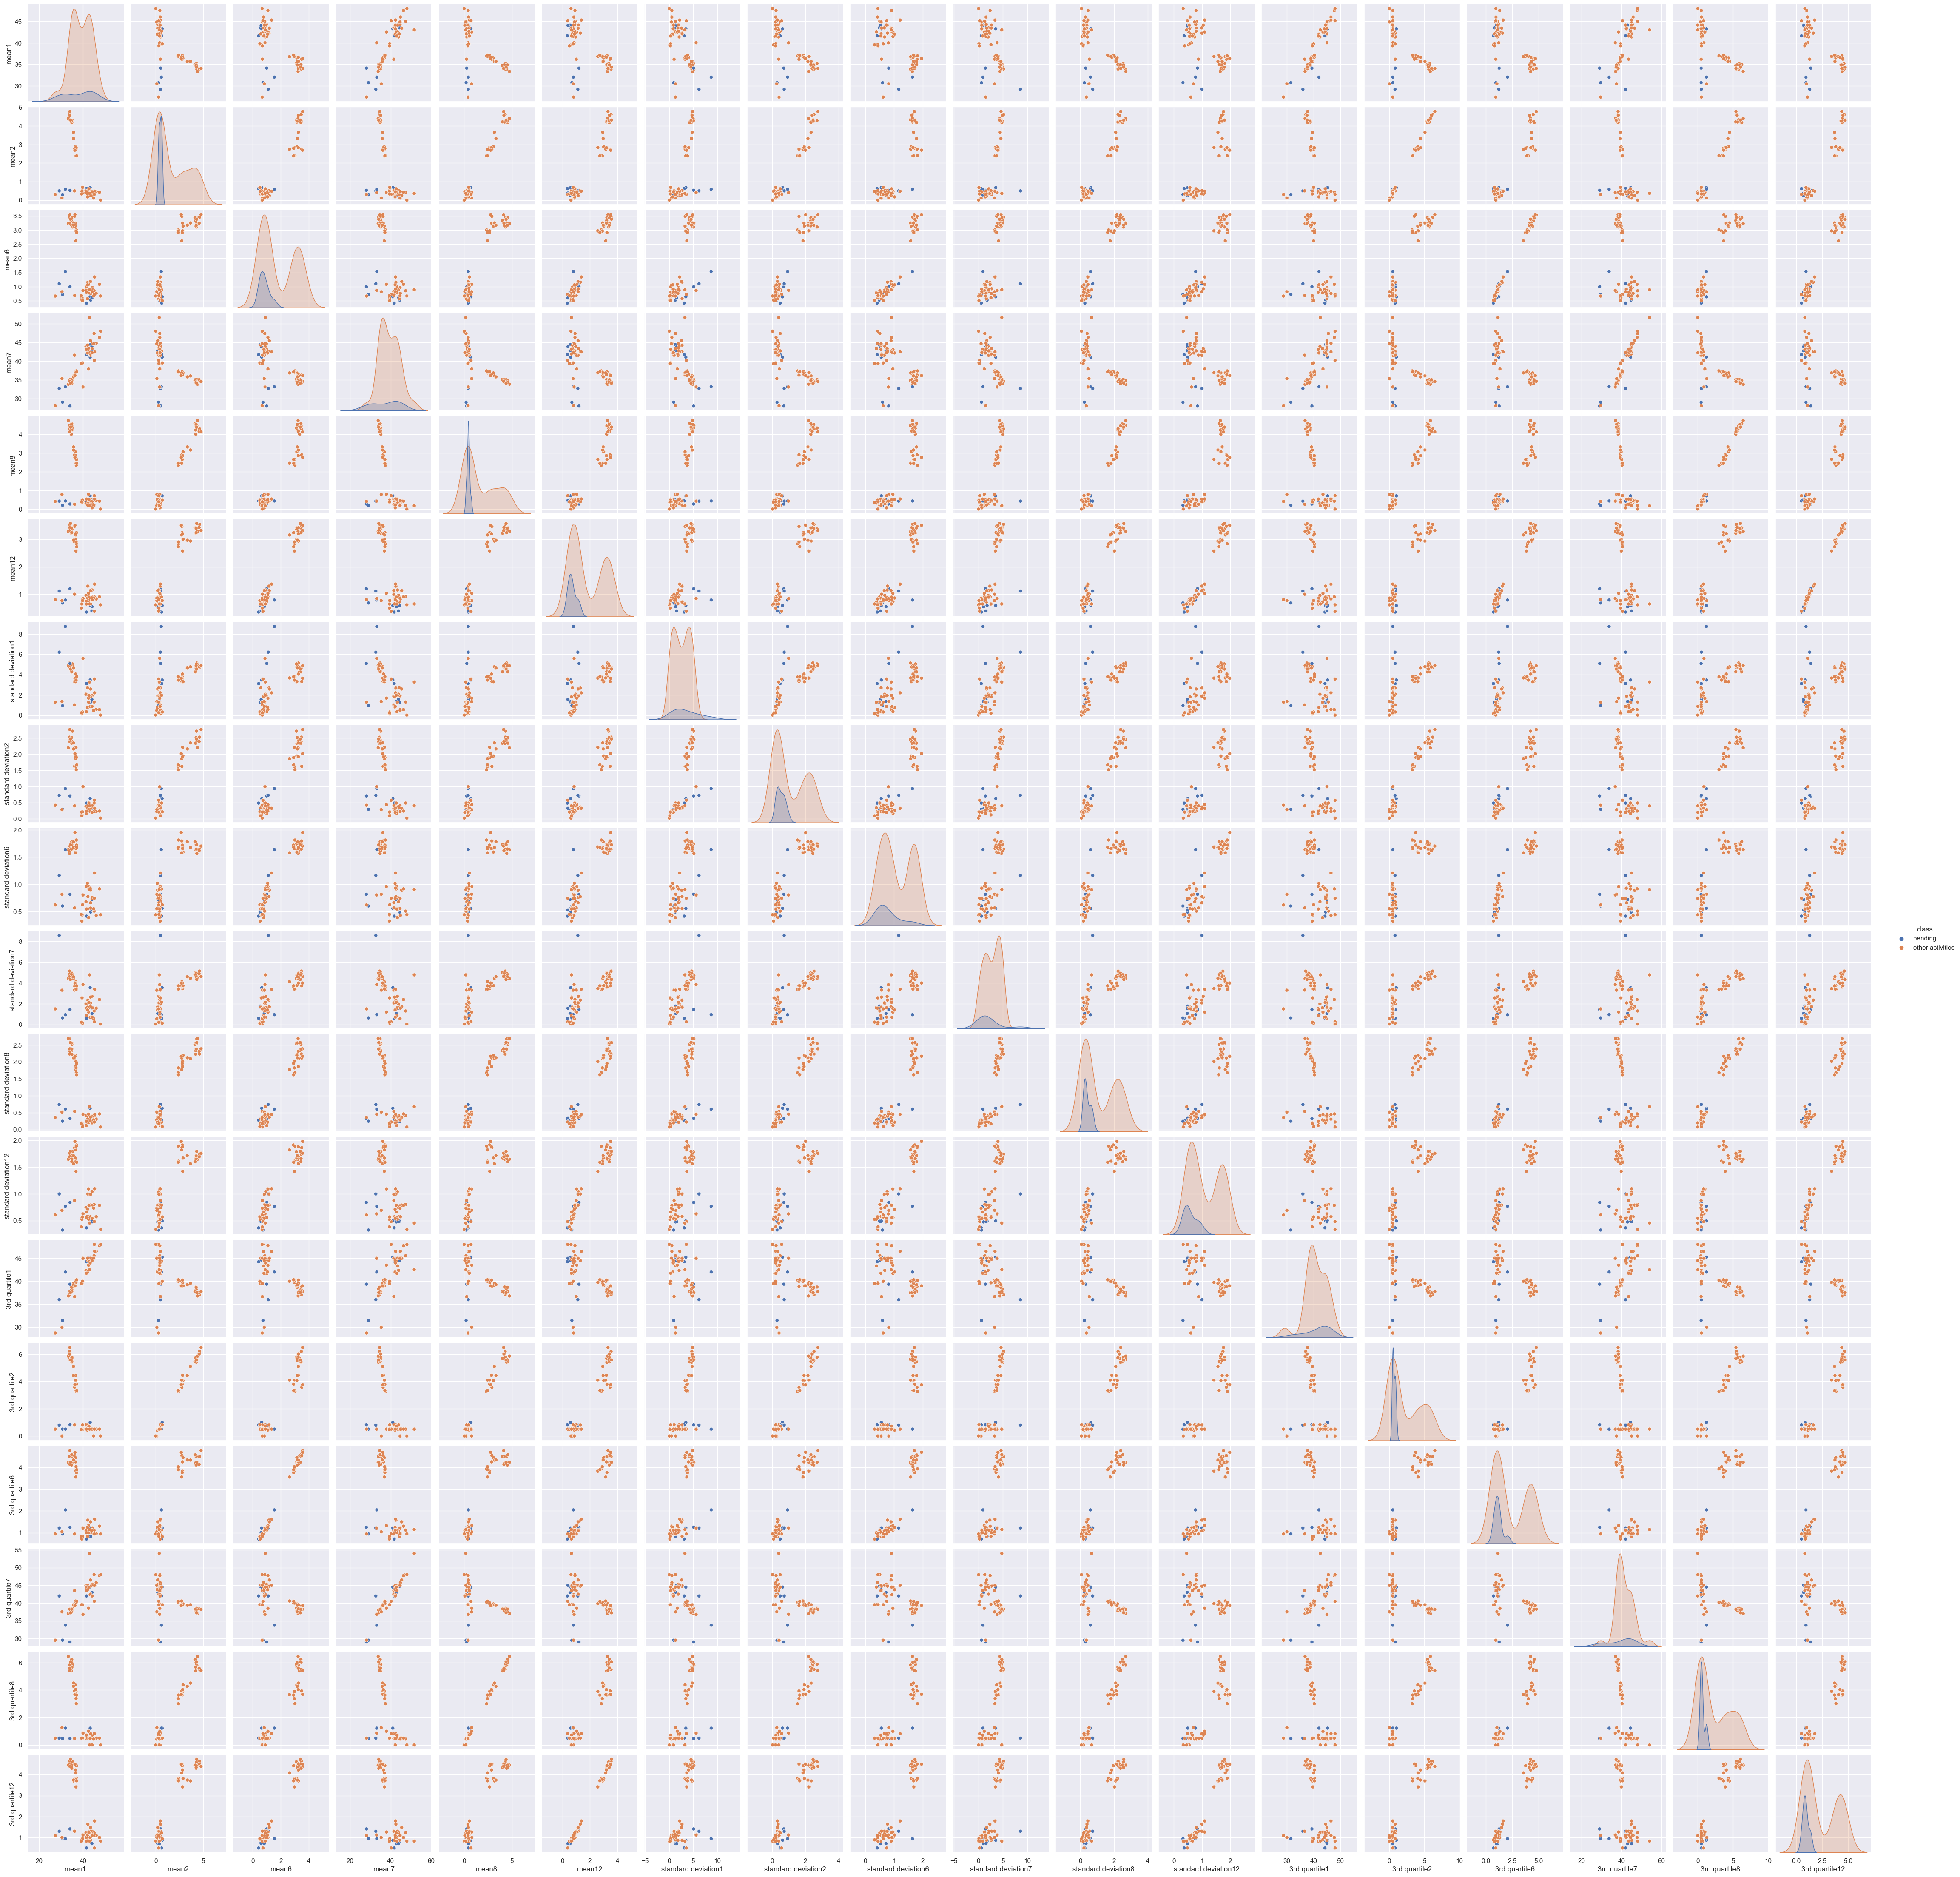

In [10]:
features_df2 = pd.DataFrame(np.zeros((len(training_df_list), 84)))
features_df2_activities = []
for count, df in enumerate(training_df_list):
    midpoint = int(df.shape[0]/2)
    df1 = df.iloc[:midpoint, :]
    df2 = df.iloc[midpoint:, :]
    row = []
    for i in range(1, len(df1.columns)-1):
        row.append(df1.iloc[:, i].min())
        row.append(df1.iloc[:, i].max())
        row.append(df1.iloc[:, i].mean())
        row.append(df1.iloc[:, i].median())
        row.append(df1.iloc[:, i].std())
        row.append(df1.iloc[:, i].quantile(0.25))
        row.append(df1.iloc[:, i].quantile(0.75))
    for i in range(1, len(df2.columns)-1): 
        row.append(df2.iloc[:, i].min())
        row.append(df2.iloc[:, i].max())
        row.append(df2.iloc[:, i].mean())
        row.append(df2.iloc[:, i].median())
        row.append(df2.iloc[:, i].std())
        row.append(df2.iloc[:, i].quantile(0.25))
        row.append(df2.iloc[:, i].quantile(0.75))
    features_df2.loc[count] = row
    features_df2_activities.append(df1['activity'][0]) 

column_name2 = []    
for i in range(1, 13):
    column_name2.append('min'+str(i))
    column_name2.append('max'+str(i))
    column_name2.append('mean'+str(i))
    column_name2.append('median'+str(i))
    column_name2.append('standard deviation'+str(i))
    column_name2.append('1st quartile'+str(i))
    column_name2.append('3rd quartile'+str(i))

features_df2.columns = column_name2
features_df2.insert(loc=0, column='Instance', value=list(range(1, 70)))
features_df2.reset_index(drop=True)
features_df2['activity'] = features_df2_activities

features_df2['class'] = features_df['activity'].isin(['bending1', 'bending2'])
features_df2['class'].replace({True: 'bending', False: 'other activities'}, inplace=True)

selected_features2 = []
for feature in ['mean', 'standard deviation', '3rd quartile']:
    for num in [1, 2, 6, 7, 8, 12]:
        selected_features2.append(feature + str(num))

pairplot2 = sns.pairplot(features_df2, hue='class', vars=selected_features2)
# pairplot2.savefig('pairplot2.png')

The two plots are very similar, one possible reason coule be that the selected features did not show the difference. From both plots, we can see that the most of the features of other activities (orange) are clustering into two clusters, with bending (blue) in one cluster.

#### iii. Time Series Segments

In [11]:
# define function for building up each feature dataframe
def get_feature_df(l, df_list):
    
    # create empty feature df based on l 
    featureDF = pd.DataFrame(np.zeros((len(df_list), l*3*6)))
    featureDF_activities = []
    for count, df in enumerate(df_list):
        
        # splitting df based on l
        df_split = np.array_split(df, l)
        row = []
        
        for sub_df in df_split:
            # get the selected three time series feature for each column
            for i in range(1, len(sub_df.columns)-1):
                row.append(sub_df.iloc[:, i].mean())
                row.append(sub_df.iloc[:, i].std())
                row.append(sub_df.iloc[:, i].quantile(0.75))
        featureDF.loc[count] = row
        featureDF_activities.append(sub_df['activity'].iloc[0])   
    
    # get column names 
    column_names = [] 
    for i in range(1, l*6+1):
        column_names.append('mean'+str(i))
        column_names.append('standard deviation'+str(i))
        column_names.append('3rd quartile'+str(i))
    featureDF.columns = column_names
    # label activity for each row
    featureDF['activity'] = featureDF_activities

    return featureDF

The right way to perform cross-validation is using backward selection to determine the best value of the pair (l, p). The reason is that when we select the features based on p-value in each model then refitting the model, the procedure has already seen the labels of the training data, which could result in overfitting.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

l_list = []
p_list = []
score_list = []
selected_features_list = []
best_score = 0
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3['class'] = features_df3['activity'].isin(['bending1', 'bending2'])
    features_df3['class'] = features_df3['class'].astype(int)
 
    # separate features and target variables
    X_train = features_df3.iloc[:, :len(features_df3.columns)-2]
    y_train = features_df3.iloc[:, -1]
       
    logReg = LogisticRegression(max_iter=1000)
    rfe = RFECV(estimator=logReg, cv=StratifiedKFold(5))
    rfe.fit(X_train, y_train)
    
    l_list.append(l)
    p = rfe.n_features_
    p_list.append(p)
    score = rfe.score(X_train, y_train)
    score_list.append(score)
    
    used_features = []
    for i in range(len(rfe.ranking_)):
        if rfe.ranking_[i] == 1:
            used_features.append(features_df3.columns[i])
    selected_features_list.append(used_features)
    
result_df = pd.DataFrame({'l': l_list, 'p': p_list, 'score': score_list})
result_df

l   p     score
0    1   2  0.942029
1    2   9  1.000000
2    3   1  0.971014
3    4   1  0.971014
4    5   1  0.971014
5    6   1  0.971014
6    7  18  1.000000
7    8  13  1.000000
8    9   1  0.956522
9   10   1  0.971014
10  11   1  0.985507
11  12   1  0.985507
12  13   1  0.971014
13  14   1  0.971014
14  15   7  1.000000
15  16   1  0.971014
16  17   1  0.985507
17  18   1  0.985507
18  19   1  0.985507
19  20   1  0.985507

There are multiple (l, p) pairs have optimal scores of 1.00. To avoid overfitting by minimizing the l, p values, we choose (2, 9) as the best pair.

In [13]:
best_l = 2
best_features = selected_features_list[best_l-1]

#### iv. Confusion Matrix

In [14]:
# using the best (l, p) pair and the selected features to reﬁt a logistic regression model
import statsmodels.api as sm

features_df4 = get_feature_df(best_l, training_df_list)
features_df4['class'] = features_df4['activity'].isin(['bending1', 'bending2'])
features_df4['class'] = features_df4['class'].astype(int)

# using best features selected
X_train_pruned = features_df4[best_features]
y_train = features_df4['class']
model = sm.Logit(y_train, X_train_pruned)
logReg = model.fit(method='lbfgs', maxiter=10, disp=False)
y_pred = logReg.predict(X_train_pruned)

# get the p-value of each parameters 
print(logReg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                   69
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.8949
Time:                        15:44:56   Log-Likelihood:                -2.8086
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.070e-07
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
mean3                  -0.1625      0.310     -0.523      0.601      -0.771       0.446
standard deviation3     0.1042      0.786      0.133      0.894      -1.436       1.644
mean5           

/Users/serenahuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Accuracy classification score: 1.0


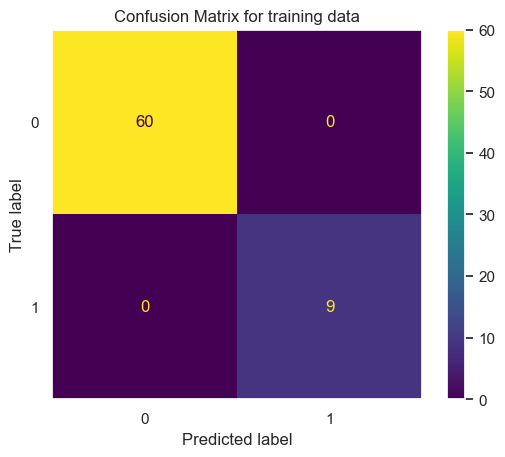

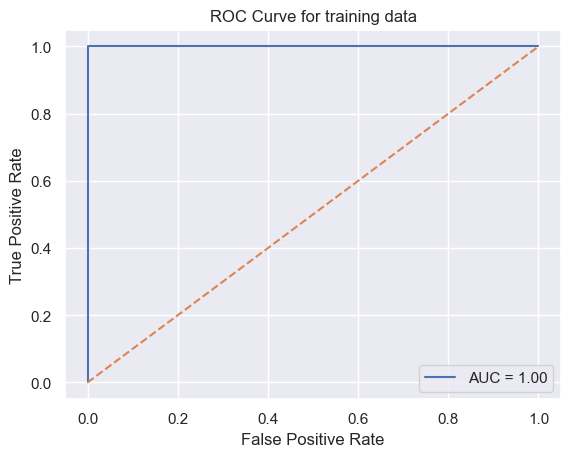

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

# fitting using sklearn LogisticRegression
logReg1 = LogisticRegression(max_iter=300).fit(X_train_pruned, y_train)
y_pred = logReg1.predict(X_train_pruned)

print('Accuracy classification score:', accuracy_score(y_train, y_pred))

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for training data')
plt.show()

#### v. Test Classifier

Accuracy classification score: 1.0


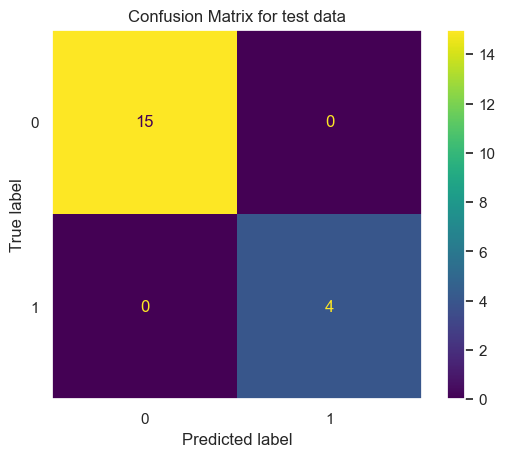

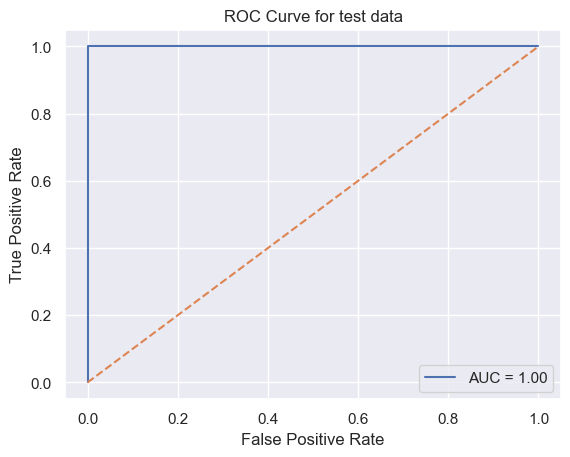

In [16]:
# using test set to test the classifier
features_df5 = get_feature_df(best_l, test_df_list)
features_df5['class'] = features_df5['activity'].isin(['bending1', 'bending2'])
features_df5['class'] = features_df5['class'].astype(int)

X_test = features_df5[best_features]
y_test = features_df5['class']
y_pred_test = logReg1.predict(X_test)

print('Accuracy classification score:', accuracy_score(y_test, y_pred_test))

cm2 = confusion_matrix(y_test, y_pred_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_test)
roc_auc2 = auc(fpr2, tpr2)
display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for test data')
plt.show()

Model has an accuracy score of 1.0 for both training set and test set.

#### vi. Separation

Yes, the classes seem to be well-separated, as shown in statsmodel output:
> Possibly complete quasi-separation: A fraction 0.25 of observations can be perfectly predicted. This might indicate that there is complete quasi-separation. In this case some parameters will not be identified.

This could be the reason why we get perfect accuracy score of 1.0

#### vii. Imbalance

Imbalanced classes can be seen from the confusion matrices. In training set, class 1 (bending) has 9 samples, while class 0 (not bending) has 60 samples, which is significantly more than class 1. 

In [17]:
# redo a(iii) using oversampling
from imblearn.over_sampling import SMOTE

l_list_res = []
p_list_res = []
score_list_res = []
selected_features_list_res =[]
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3['class'] = features_df3['activity'].isin(['bending1', 'bending2'])
    features_df3['class'] = features_df3['class'].astype(int)
    
    # separate features and target variables
    X_train = features_df3.iloc[:, :len(features_df3.columns)-2]
    y_train = features_df3.iloc[:, -1]
    
    # upsampling the data
    X_res, y_res = SMOTE(random_state=42).fit_resample(X_train, y_train)
    
    # building model based on new data
    logReg = LogisticRegression(max_iter=300)
    rfe = RFECV(estimator=logReg, cv=StratifiedKFold(5))
    rfe.fit(X_res, y_res)
    
    l_list_res.append(l)
    p = rfe.n_features_
    p_list_res.append(p)
    score = rfe.score(X_res, y_res)
    score_list_res.append(score)
    
    used_features = []
    for i in range(len(rfe.ranking_)):
        if rfe.ranking_[i] == 1:
            used_features.append(features_df3.columns[i])
    selected_features_list_res.append(used_features)

result_df_res = pd.DataFrame({'l': l_list_res, 'p': p_list_res, 'score': score_list_res})
result_df_res

l   p     score
0    1   5  0.991667
1    2  18  1.000000
2    3   3  1.000000
3    4   4  1.000000
4    5   4  1.000000
5    6   6  1.000000
6    7   8  1.000000
7    8  13  1.000000
8    9   6  1.000000
9   10   4  1.000000
10  11   5  1.000000
11  12  32  1.000000
12  13   4  1.000000
13  14  14  1.000000
14  15   7  1.000000
15  16   5  1.000000
16  17  11  1.000000
17  18   2  1.000000
18  19  13  1.000000
19  20   3  1.000000

There are multiple (l, p) pairs have optimal scores of 1.00. To avoid overfitting by minimizing the l, p values, we choose (3, 3) as the best pair.

In [18]:
best_l_res = 3
best_features_res = selected_features_list_res[best_l_res-1]

Accuracy classification score: 1.0


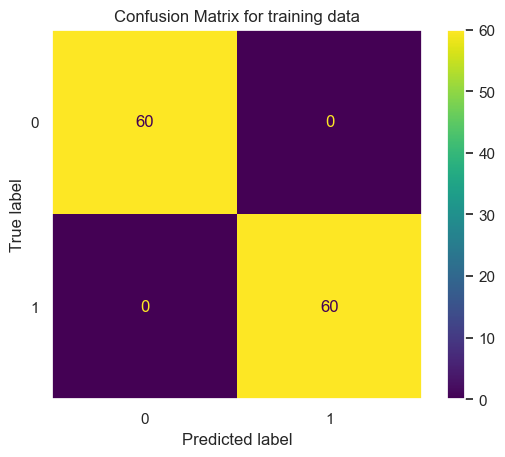

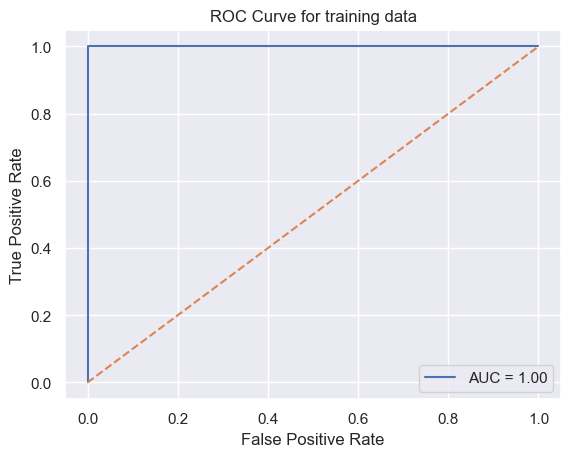

In [19]:
# refitting the model using selected (l, p) pair
features_df6 = get_feature_df(best_l_res, training_df_list)
features_df6['class'] = features_df6['activity'].isin(['bending1', 'bending2'])
features_df6['class'] = features_df6['class'].astype(int)
    
X_train_res = features_df6[best_features_res]
y_train_res = features_df6['class']
X_res, y_res = SMOTE(random_state=42).fit_resample(X_train_res, y_train_res)

logReg2 = LogisticRegression(max_iter=1000).fit(X_res, y_res)
y_pred_res = logReg2.predict(X_res)

print('Accuracy classification score:', accuracy_score(y_res, y_pred_res))

cm_res = confusion_matrix(y_res, y_pred_res)
disp_res = ConfusionMatrixDisplay(confusion_matrix=cm_res).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

fpr3, tpr3, thresholds3 = roc_curve(y_res, y_pred_res)
roc_auc3 = auc(fpr3, tpr3)
display3 = RocCurveDisplay(fpr=fpr3, tpr=tpr3, roc_auc=roc_auc3).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for training data')
plt.show()

Accuracy classification score: 1.0


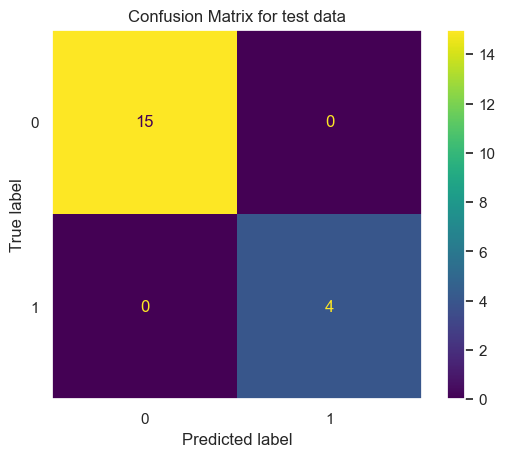

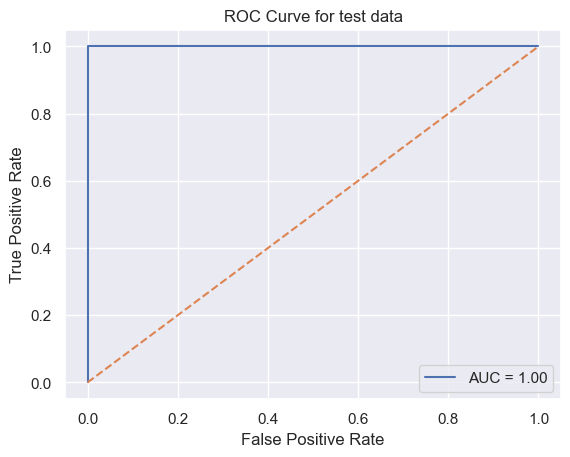

In [20]:
# using test data to test the classifier
features_df7 = get_feature_df(best_l_res, test_df_list)
features_df7['class'] = features_df7['activity'].isin(['bending1', 'bending2'])
features_df7['class'] = features_df7['class'].astype(int)
    
X_test_res = features_df7[best_features_res]
y_test_res = features_df7['class']
y_pred_test_res = logReg2.predict(X_test_res)
       
print('Accuracy classification score:', accuracy_score(y_test_res, y_pred_test_res))

cm_res2 = confusion_matrix(y_test_res, y_pred_test_res)
disp_res2 = ConfusionMatrixDisplay(confusion_matrix=cm_res2).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

fpr4, tpr4, thresholds4 = roc_curve(y_test_res, y_pred_test_res)
roc_auc4 = auc(fpr4, tpr4)
display4 = RocCurveDisplay(fpr=fpr4, tpr=tpr4, roc_auc=roc_auc4).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for test data')
plt.show()

After upsampling, the accuracy score is 1.0

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV

l_list_l1 = []
score_list_l1 = []
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3['class'] = features_df3['activity'].isin(['bending1', 'bending2'])
    features_df3['class'] = features_df3['class'].astype(int)

    # separate features and target variables
    X_train = features_df3.iloc[:, :len(features_df3.columns)-2]
    y_train = features_df3.iloc[:, -1]
    
    # normalizing the data 
    X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)
    
    # using l1-penalized logistic regression with cross validation
    logReg = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=300, 
                                  random_state=42).fit(X_train_normalized, y_train)
    
    l_list_l1.append(l)
    score = logReg.score(X_train_normalized, y_train)
    score_list_l1.append(score)
    
result_df_l1 = pd.DataFrame({'l': l_list_l1, 'score': score_list_l1})
result_df_l1

l     score
0    1  0.942029
1    2  0.956522
2    3  0.985507
3    4  1.000000
4    5  1.000000
5    6  1.000000
6    7  1.000000
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  1.000000
11  12  1.000000
12  13  1.000000
13  14  1.000000
14  15  1.000000
15  16  1.000000
16  17  1.000000
17  18  1.000000
18  19  1.000000
19  20  1.000000

Accuracy classification score: 1.0


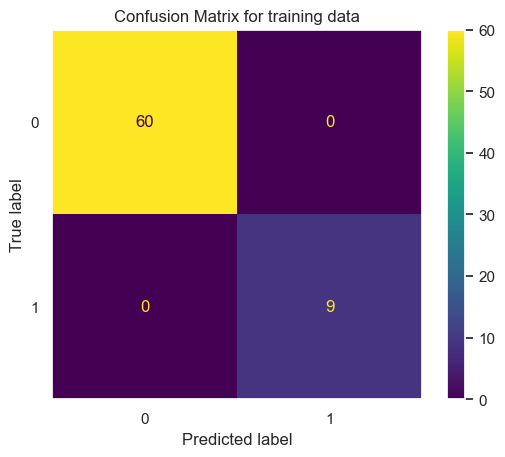

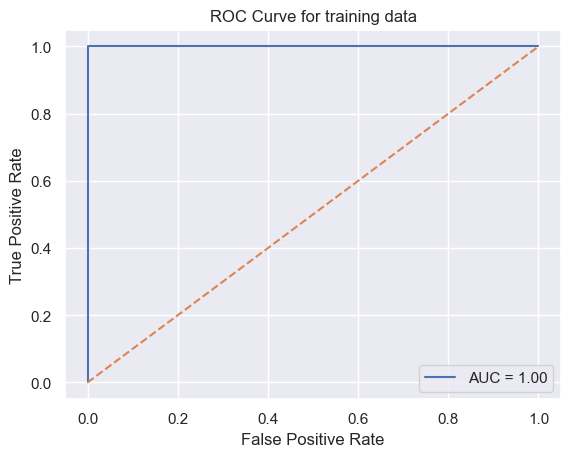

In [22]:
# refit the model with l = 4
best_l_l1 = 4

features_df8 = get_feature_df(best_l_l1, training_df_list)
features_df8['class'] = features_df8['activity'].isin(['bending1', 'bending2'])
features_df8['class'] = features_df8['class'].astype(int)

# separate features and target variables
X_train_l1 = features_df8.iloc[:, :len(features_df8.columns)-2]
y_train_l1 = features_df8.iloc[:, -1]
    
# normalizing the data 
X_train_l1_normalized = MinMaxScaler().fit(X_train_l1).transform(X_train_l1)

# using l1-penalized logistic regression model with cross validation
logReg_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=300, 
                                 random_state=42).fit(X_train_l1_normalized, y_train_l1)
y_pred_l1 = logReg_l1.predict(X_train_l1_normalized)

print('Accuracy classification score:', accuracy_score(y_train_l1, y_pred_l1))

cm_l1 = confusion_matrix(y_train_l1, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(confusion_matrix=cm_l1).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

fpr5, tpr5, thresholds5 = roc_curve(y_train_l1, y_pred_l1)
roc_auc5 = auc(fpr5, tpr5)
display5 = RocCurveDisplay(fpr=fpr5, tpr=tpr5, roc_auc=roc_auc5).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for training data')
plt.show()

Accuracy classification score: 0.9473684210526315


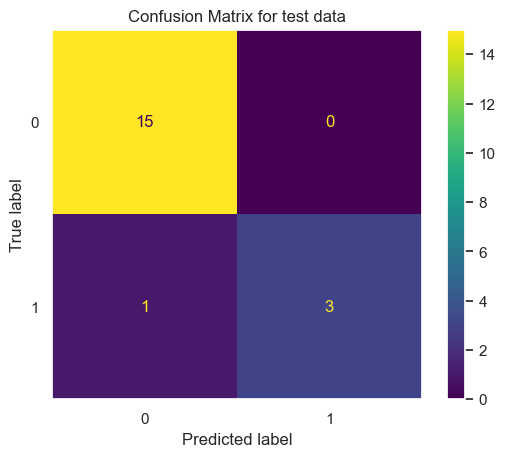

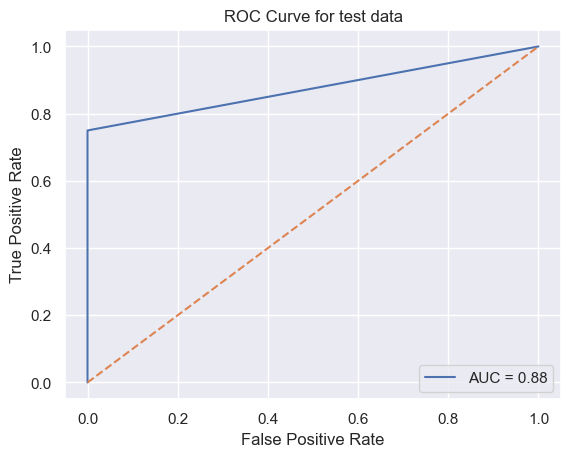

In [23]:
# using test data to test the classifier
features_df9 = get_feature_df(best_l_l1, test_df_list)
features_df9['class'] = features_df9['activity'].isin(['bending1', 'bending2'])
features_df9['class'] = features_df9['class'].astype(int)

X_test_l1 = features_df9.iloc[:, :len(features_df9.columns)-2]
y_test_l1 = features_df9.iloc[:, -1]
X_test_l1_normalized = MinMaxScaler().fit(X_test_l1).transform(X_test_l1)
y_pred_test_l1 = logReg_l1.predict(X_test_l1_normalized)

print('Accuracy classification score:', accuracy_score(y_test_l1, y_pred_test_l1))

cm_l1_test = confusion_matrix(y_test_l1, y_pred_test_l1)
disp_l1_test  = ConfusionMatrixDisplay(confusion_matrix=cm_l1_test ).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

fpr6, tpr6, thresholds6 = roc_curve(y_test_l1, y_pred_test_l1)
roc_auc6 = auc(fpr6, tpr6)
display6 = RocCurveDisplay(fpr=fpr6, tpr=tpr6, roc_auc=roc_auc6).plot()
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve for test data')
plt.show()

#### ii. Comparison

Comparing the final feature selection model from part a to this model with l1-penalized, the l1-penalized model has a lower accuracy classification score for test data (0.95 compared to 1.0 in feature selection model). However, the l1-penalized is easier to implemented as we do not need to do feature selection every time. 

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [24]:
l_list_multiclass = []
score_list_multiclass = []
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3.loc[features_df3['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

    # separate features and target variables
    X_train = features_df3.iloc[:, :-1]
    y_train = features_df3.iloc[:, -1]
    # normalizing the data 
    X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)
    
    # using l1-penalized logistic regression model with cross validation
    logReg = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=5000, 
                                  random_state=42, multi_class='multinomial').fit(X_train_normalized, y_train)
    
    l_list_multiclass.append(l)
    score = logReg.score(X_train_normalized, y_train)
    score_list_multiclass.append(score)
    
result_df_multiclass = pd.DataFrame({'l': l_list_multiclass, 'score': score_list_multiclass})
result_df_multiclass

/Users/serenahuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


l     score
0    1  1.000000
1    2  1.000000
2    3  1.000000
3    4  1.000000
4    5  1.000000
5    6  1.000000
6    7  1.000000
7    8  1.000000
8    9  1.000000
9   10  1.000000
10  11  0.985507
11  12  1.000000
12  13  1.000000
13  14  1.000000
14  15  1.000000
15  16  1.000000
16  17  1.000000
17  18  1.000000
18  19  1.000000
19  20  1.000000

Accuracy classification score: 1.0


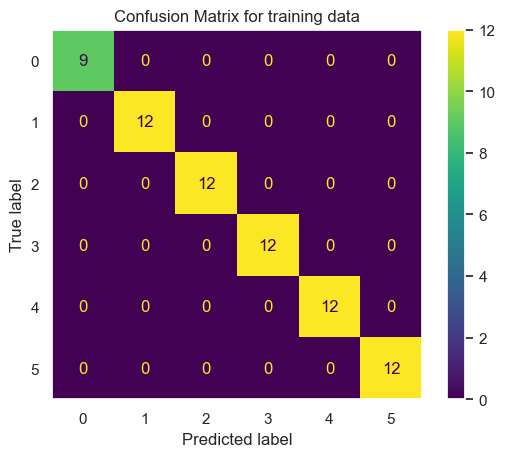

In [25]:
# choose l=1 to refit the model 
best_l_multiclass = 1

features_df10 = get_feature_df(best_l_multiclass, training_df_list)
features_df10.loc[features_df10['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_train_multiclass = features_df10.iloc[:, :-1]
y_train_multiclass = features_df10.iloc[:, -1]
X_train_multiclass_normalized = MinMaxScaler().fit(X_train_multiclass).transform(X_train_multiclass)
    
logReg_multiclass = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', max_iter=5000, 
                                 random_state=42).fit(X_train_multiclass_normalized, y_train_multiclass)

y_pred_multiclass = logReg_multiclass.predict(X_train_multiclass_normalized)

print('Accuracy classification score:', accuracy_score(y_train_multiclass, y_pred_multiclass))

# get confusion matrix
cm_multiclass = confusion_matrix(y_train_multiclass, y_pred_multiclass)
disp_multiclass = ConfusionMatrixDisplay(confusion_matrix=cm_multiclass).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

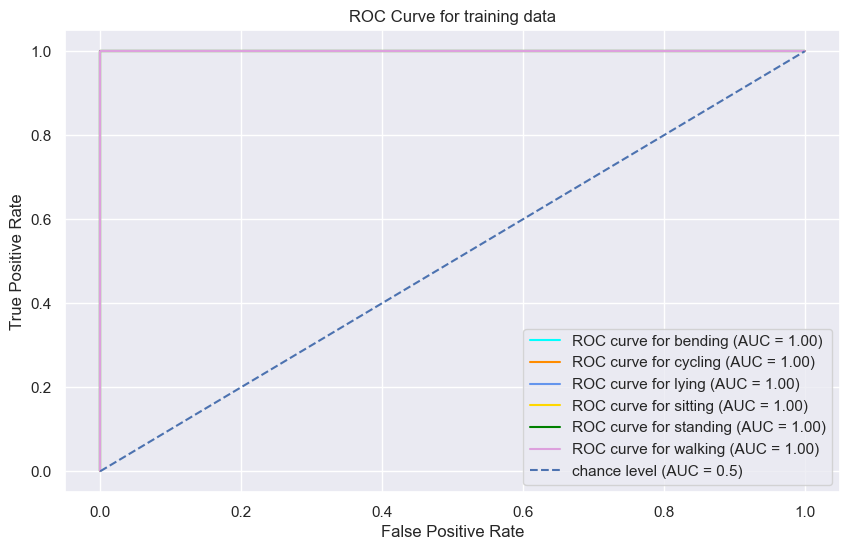

In [26]:
# plotting ROC curve for each activity by first binarizing the data
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

label_binarizer = LabelBinarizer().fit(y_train_multiclass)
y_train_binarizer = label_binarizer.transform(y_train_multiclass)
y_predict_proba = logReg_multiclass.predict_proba(X_train_multiclass_normalized)
activity_names = np.unique(y_train_multiclass)

n_classes = len(np.unique(y_train_multiclass))
fig, axes = plt.subplots(figsize=(10, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "gold", "green", "plum"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_train_binarizer[:, class_id],
        y_predict_proba[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for training data')
plt.legend()
plt.show()

Accuracy classification score: 0.7894736842105263
Test error: 0.21052631578947367


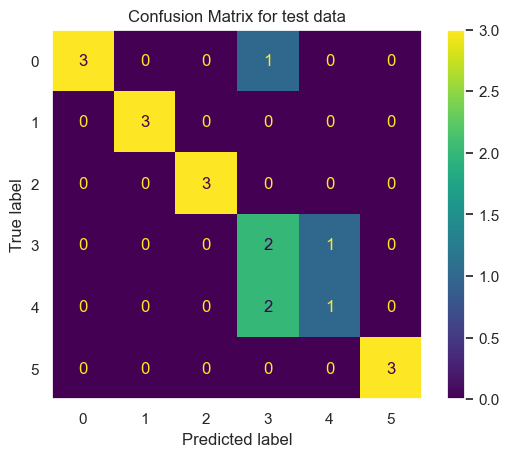

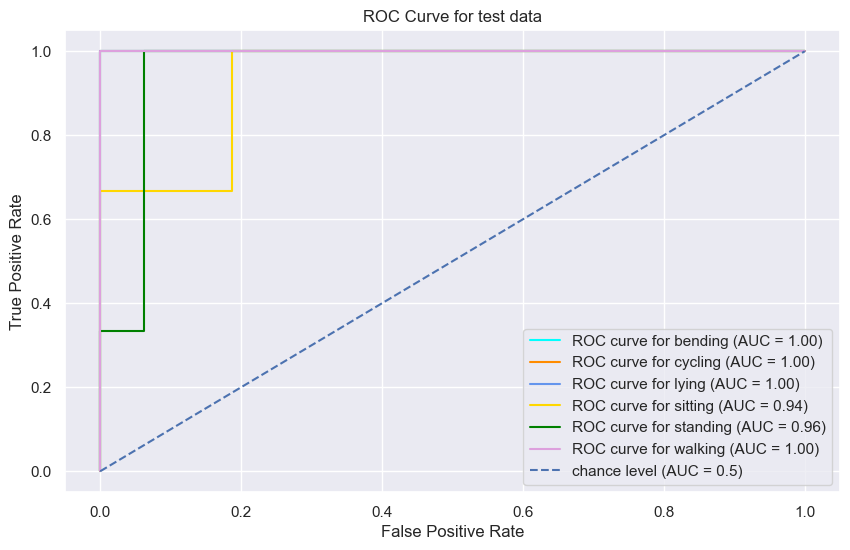

In [27]:
# using test data to test the classifier
features_df11 = get_feature_df(best_l_multiclass, test_df_list)
features_df11.loc[features_df11['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_test_multiclass = features_df11.iloc[:, :-1]
y_test_multiclass = features_df11.iloc[:, -1]
X_test_multiclass_normalized = MinMaxScaler().fit(X_test_multiclass).transform(X_test_multiclass)
y_pred_multiclass_test = logReg_multiclass.predict(X_test_multiclass_normalized)

print('Accuracy classification score:', accuracy_score(y_test_multiclass, y_pred_multiclass_test))
print('Test error:', 1-logReg_multiclass.score(X_test_multiclass_normalized, y_test_multiclass))

# confusion matrix for test data
cm_multiclass_test = confusion_matrix(y_test_multiclass, y_pred_multiclass_test)
disp_multiclass_test = ConfusionMatrixDisplay(confusion_matrix=cm_multiclass_test).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

# ROC curve for test data
y_test_binarizer = LabelBinarizer().fit(y_test_multiclass).transform(y_test_multiclass)
y_predict_proba_test = logReg_multiclass.predict_proba(X_test_multiclass_normalized)

fig, axes = plt.subplots(figsize=(10, 6))
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_binarizer[:, class_id],
        y_predict_proba_test[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for test data')
plt.legend()
plt.show()

#### ii. Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

l_list_Gaussian = []
score_list_Gaussian = []
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3.loc[features_df3['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

    # separate features and target variables
    X_train = features_df3.iloc[:, :-1]
    y_train = features_df3.iloc[:, -1]
    # normalizing the data 
    X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)
    
    # using Gaussian Naive Bayes
    Gaussian = GaussianNB().fit(X_train_normalized, y_train)
    
    l_list_Gaussian.append(l)
    score = Gaussian.score(X_train_normalized, y_train)
    score_list_Gaussian.append(score)
    
result_df_Gaussian = pd.DataFrame({'l': l_list_Gaussian, 'score': score_list_Gaussian})
result_df_Gaussian

l     score
0    1  0.956522
1    2  0.985507
2    3  0.985507
3    4  0.971014
4    5  0.971014
5    6  0.985507
6    7  0.985507
7    8  0.985507
8    9  0.985507
9   10  0.985507
10  11  0.985507
11  12  0.985507
12  13  0.985507
13  14  0.985507
14  15  0.985507
15  16  0.985507
16  17  0.985507
17  18  0.985507
18  19  0.985507
19  20  0.985507

Accuracy classification score: 0.9855072463768116


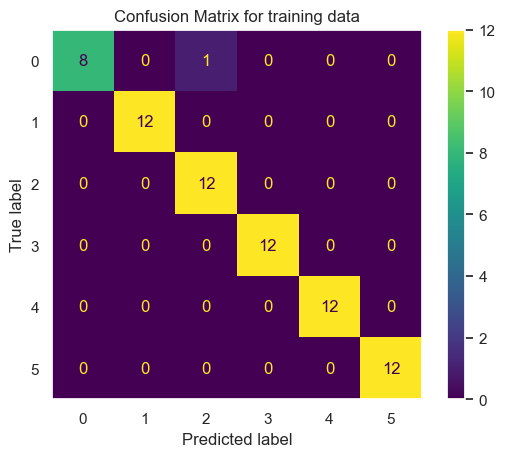

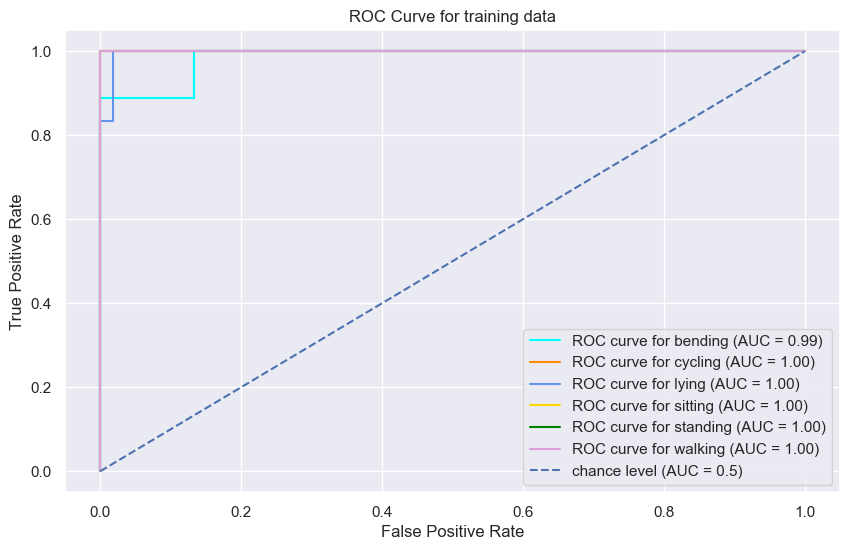

In [29]:
# Choose l=2 to refit the model 
best_l_Gaussian = 2

features_df12 = get_feature_df(best_l_Gaussian, training_df_list)
features_df12.loc[features_df12['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_train_Gaussian = features_df12.iloc[:, :-1]
y_train_Gaussian = features_df12.iloc[:, -1]
X_train_Gaussian_normalized = MinMaxScaler().fit(X_train_Gaussian).transform(X_train_Gaussian)
    
Gaussian = GaussianNB().fit(X_train_Gaussian_normalized, y_train_Gaussian)

y_pred_Gaussian = Gaussian.predict(X_train_Gaussian_normalized)

print('Accuracy classification score:', accuracy_score(y_train_Gaussian, y_pred_Gaussian))

# get confusion matrix for training data 
cm_Gaussian = confusion_matrix(y_train_Gaussian, y_pred_Gaussian)
disp_Gaussian = ConfusionMatrixDisplay(confusion_matrix=cm_Gaussian).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

# plot ROC curve for training data
y_train_binarizer2 = LabelBinarizer().fit(y_train_Gaussian).transform(y_train_Gaussian)
y_predict_proba2 = Gaussian.predict_proba(X_train_Gaussian_normalized)

fig, axes = plt.subplots(figsize=(10, 6))
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_train_binarizer2[:, class_id],
        y_predict_proba2[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for training data')
plt.legend()
plt.show()

Accuracy classification score: 0.5789473684210527
Test error: 0.42105263157894735


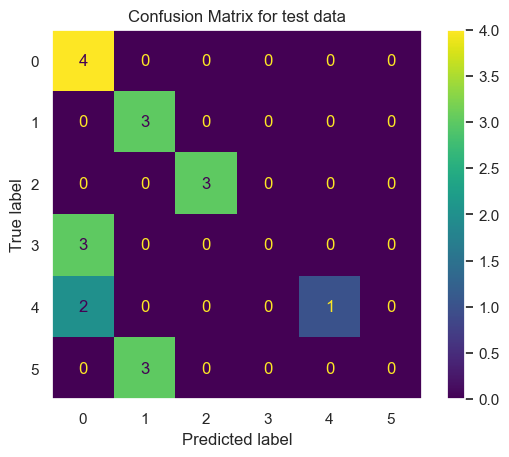

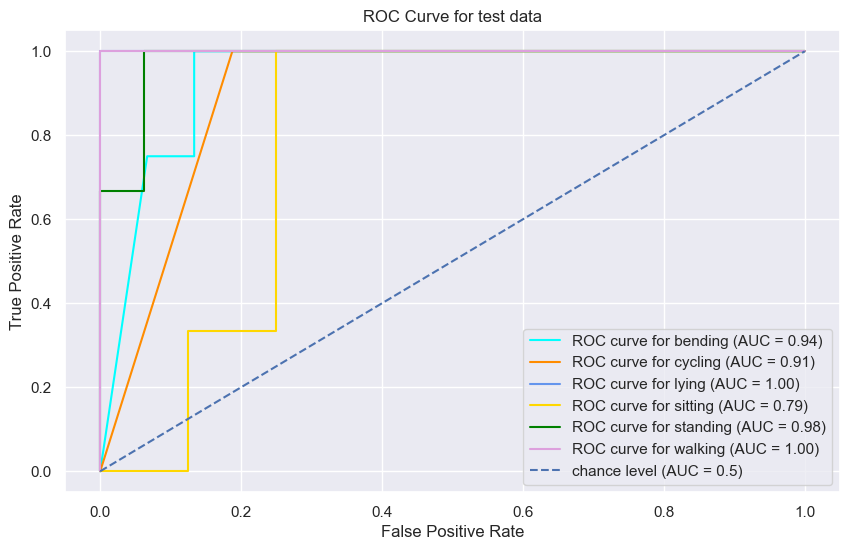

In [30]:
# using test data to test the classifier
features_df13 = get_feature_df(best_l_Gaussian, test_df_list)
features_df13.loc[features_df13['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_test_Gaussian = features_df13.iloc[:, :-1]
y_test_Gaussian = features_df13.iloc[:, -1]
X_test_Gaussian_normalized = MinMaxScaler().fit(X_test_Gaussian).transform(X_test_Gaussian)
y_pred_Gaussian_test = Gaussian.predict(X_test_Gaussian_normalized)

print('Accuracy classification score:', accuracy_score(y_test_Gaussian, y_pred_Gaussian_test))
print('Test error:', 1-Gaussian.score(X_test_Gaussian_normalized, y_test_Gaussian))

cm_Gaussian_test = confusion_matrix(y_test_Gaussian, y_pred_Gaussian_test)
disp_Gaussian_test = ConfusionMatrixDisplay(confusion_matrix=cm_Gaussian_test).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

# ROC curve for test data
y_test_binarizer2 = LabelBinarizer().fit(y_test_Gaussian).transform(y_test_Gaussian)
y_predict_proba2_test = Gaussian.predict_proba(X_test_Gaussian_normalized)

fig, axes = plt.subplots(figsize=(10, 6))
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_binarizer2[:, class_id],
        y_predict_proba2_test[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for test data')
plt.legend()
plt.show()

In [31]:
from sklearn.naive_bayes import MultinomialNB

l_list_Multinomial = []
score_list_Multinomial = []
for l in range(1, 21):
    features_df3 = get_feature_df(l, training_df_list)
    features_df3.loc[features_df3['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

    # separate features and target variables
    X_train = features_df3.iloc[:, :-1]
    y_train = features_df3.iloc[:, -1]
    # normalizing the data 
    X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)
    
    # using Multinomial Naive bayes
    Multinomial = MultinomialNB().fit(X_train_normalized, y_train)
    
    l_list_Multinomial.append(l)
    score = Multinomial.score(X_train_normalized, y_train)
    score_list_Multinomial.append(score)
    
result_df_Multinomial = pd.DataFrame({'l': l_list_Multinomial, 'score': score_list_Multinomial})
result_df_Multinomial

l     score
0    1  0.768116
1    2  0.869565
2    3  0.869565
3    4  0.884058
4    5  0.884058
5    6  0.855072
6    7  0.869565
7    8  0.869565
8    9  0.884058
9   10  0.884058
10  11  0.869565
11  12  0.869565
12  13  0.884058
13  14  0.869565
14  15  0.898551
15  16  0.869565
16  17  0.884058
17  18  0.869565
18  19  0.884058
19  20  0.898551

Accuracy classification score: 0.8985507246376812


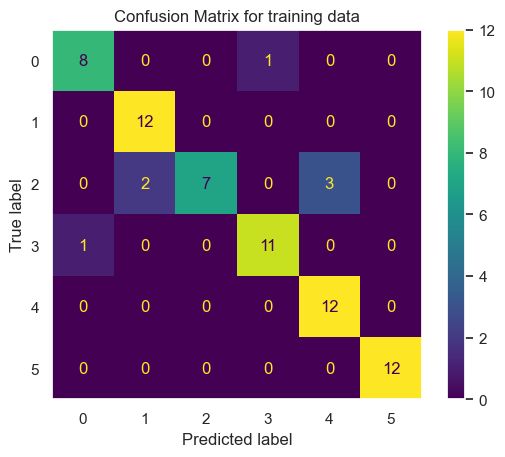

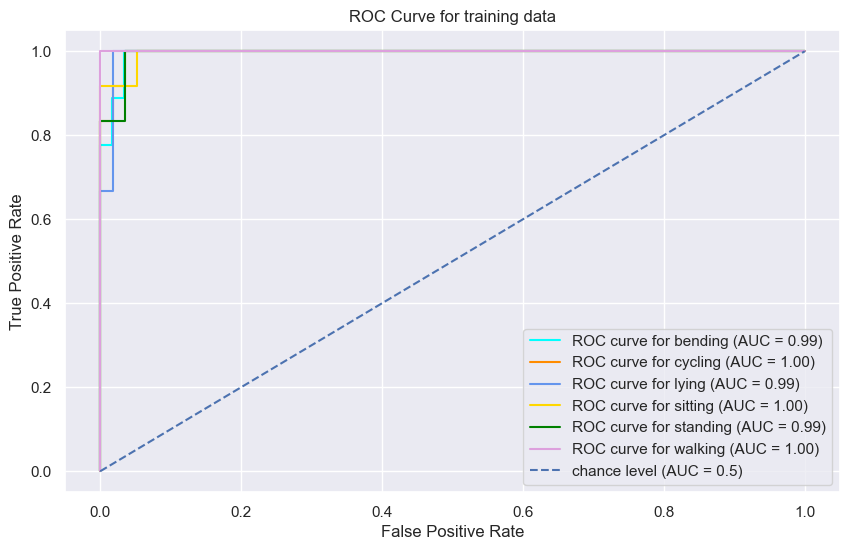

In [32]:
# Choose l=15 to refit the model 
best_l_Multinomial = 15

features_df14 = get_feature_df(best_l_Multinomial, training_df_list)
features_df14.loc[features_df14['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_train_Multinomial = features_df14.iloc[:, :-1]
y_train_Multinomial = features_df14.iloc[:, -1]
X_train_Multinomial_normalized = MinMaxScaler().fit(X_train_Multinomial).transform(X_train_Multinomial)
    
Multinomial = MultinomialNB().fit(X_train_Multinomial_normalized, y_train_Multinomial)

y_pred_Multinomial = Multinomial.predict(X_train_Multinomial_normalized)

print('Accuracy classification score:', accuracy_score(y_train_Multinomial, y_pred_Multinomial))

# get confusion matrix
cm_Multinomial = confusion_matrix(y_train_Multinomial, y_pred_Multinomial)
disp_Multinomial = ConfusionMatrixDisplay(confusion_matrix=cm_Multinomial).plot()
plt.title('Confusion Matrix for training data')
plt.grid(False)

# plot ROC curve
y_train_binarizer3 = LabelBinarizer().fit(y_train_Multinomial).transform(y_train_Multinomial)
y_predict_proba3 = Multinomial.predict_proba(X_train_Multinomial_normalized)

fig, axes = plt.subplots(figsize=(10, 6))
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_train_binarizer3[:, class_id],
        y_predict_proba3[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for training data')
plt.legend()
plt.show()

Accuracy classification score: 0.8947368421052632
Test error: 0.10526315789473684


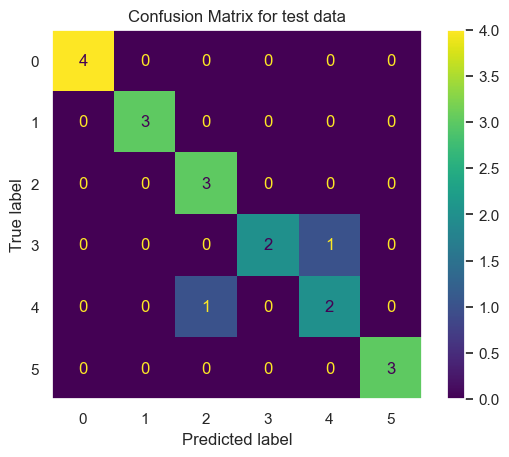

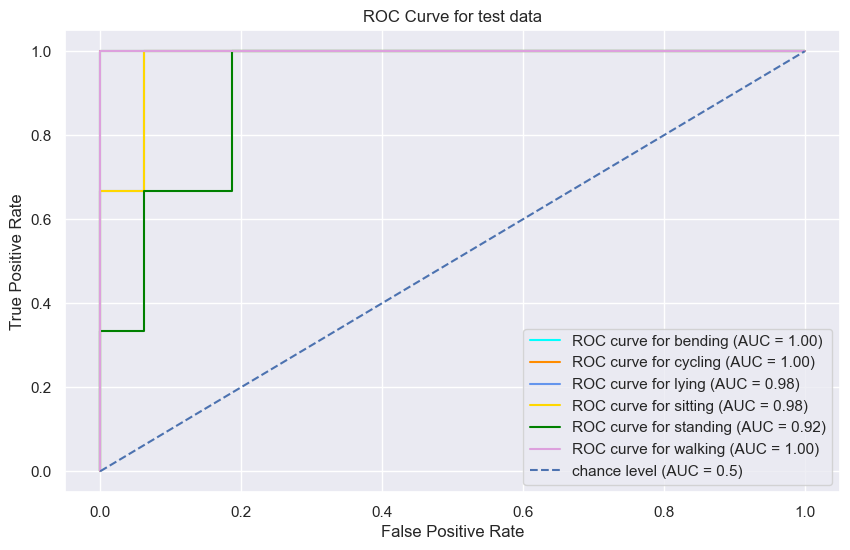

In [33]:
# using test data to test the classifier
features_df15 = get_feature_df(best_l_Multinomial, test_df_list)
features_df15.loc[features_df15['activity'].isin(['bending1', 'bending2']), 'activity'] = 'bending'

X_test_Multinomial = features_df15.iloc[:, :-1]
y_test_Multinomial = features_df15.iloc[:, -1]
X_test_Multinomial_normalized = MinMaxScaler().fit(X_test_Multinomial).transform(X_test_Multinomial)
y_pred_Multinomial_test = Multinomial.predict(X_test_Multinomial_normalized)

print('Accuracy classification score:', accuracy_score(y_test_Multinomial, y_pred_Multinomial_test))
print('Test error:', 1-Multinomial.score(X_test_Multinomial_normalized, y_test_Multinomial))

# confusion matrix
cm_Multinomial_test = confusion_matrix(y_test_Multinomial, y_pred_Multinomial_test)
disp_Multinomial_test = ConfusionMatrixDisplay(confusion_matrix=cm_Multinomial_test).plot()
plt.title('Confusion Matrix for test data')
plt.grid(False)

# ROC curve
y_test_binarizer3 = LabelBinarizer().fit(y_test_Multinomial).transform(y_test_Multinomial)
y_predict_proba3_test = Multinomial.predict_proba(X_test_Multinomial_normalized)

fig, axes = plt.subplots(figsize=(10, 6))
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test_binarizer3[:, class_id],
        y_predict_proba3_test[:, class_id],
        name=f"ROC curve for {activity_names[class_id]}",
        color=color,
        ax=axes,
    )
plt.plot([0, 1], [0, 1], '--', label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for test data')
plt.legend()
plt.show()

Comparing Gaussian Naive bayes and Multinomial Naive bayes, Multinomial performs better than Gaussian with a higher accuracy classification score on test data of 0.89 (compared to 0.58 of Gaussian) and lower test error of 0.11 (compared to 0.42 of Gaussian). However, for the training data, Gaussian has a higher accuracy score of 0.99 compared to 0.90 of Multinomial.

#### ii. Comparison

In [34]:
multi_class_classification = pd.DataFrame({'l1-penalized multinomial regression': 
                                           [logReg_multiclass.score(X_train_multiclass_normalized, y_train_multiclass), 
                                            logReg_multiclass.score(X_test_multiclass_normalized, y_test_multiclass), 
                                            1-logReg_multiclass.score(X_test_multiclass_normalized, y_test_multiclass)], 
                                           'Gaussian Naive bayes': 
                                           [Gaussian.score(X_train_Gaussian_normalized, y_train_Gaussian), 
                                            Gaussian.score(X_test_Gaussian_normalized, y_test_Gaussian), 
                                            1-Gaussian.score(X_test_Gaussian_normalized, y_test_Gaussian)], 
                                           'Multinomial Naive bayes': 
                                           [Multinomial.score(X_train_Multinomial_normalized, y_train_Multinomial), 
                                            Multinomial.score(X_test_Multinomial_normalized, y_test_Multinomial), 
                                            1-Multinomial.score(X_test_Multinomial_normalized, y_test_Multinomial)]}, 
                                          index=['training accuracy', 'test accuracy', 'test error'])

multi_class_classification

l1-penalized multinomial regression  Gaussian Naive bayes  \
training accuracy                             1.000000              0.985507   
test accuracy                                 0.789474              0.578947   
test error                                    0.210526              0.421053   

                   Multinomial Naive bayes  
training accuracy                 0.898551  
test accuracy                     0.894737  
test error                        0.105263

For the three models, l1-penalized multinomial regression has the highest training accuracy and Multinomial Naive bayes has the highest test accuracy. As we should always choose a model based on test accuracy to avoid overfitting, we choose Multinomial Naive bayes as the better model for multi-class classification.

## 3. ISLR 4.8.3

### Reference

https://seaborn.pydata.org/generated/seaborn.PairGrid.savefig.html

https://numpy.org/doc/stable/reference/generated/numpy.array_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.fit.html

https://www.kaggle.com/general/107836

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://stackoverflow.com/questions/63591238/fixing-confusion-matrix-plot-lines

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB